<b>DATA MINING <br>
ROCHI EKO PAMBUDI (1301170761)

<h4>BACKGROUND </h4>
Di sebuah toko perbelanjaan terdapat 2 metode pembayaran yaitu dengan self-checkout stasioner dimana customer membawa keranjang belanja dan mereka ke tempat scan untuk membayarnya atau dengan self-checkout semi-stasioner di mana pelanggan memindai produk mereka secara langsung dan hanya membayar di konter. <br>
Pada task ini penulis akan melakukan proses klasifikasi terhadap data set mengenai deteksi frud. Untuk meminimalisir kerugian toko tersebut.


In [56]:
#Import Library for this model
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h5> Load The data

1. Data Train

In [57]:
#Data train
df_train = pd.read_csv("train.csv", delimiter="|")
df_train.head(2)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0


2. Data Test

In [58]:
#Data test
X_test = pd.read_csv("test.csv", delimiter="|")
X_test.head(2)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259


3. Data Target Test

In [59]:
#Target Data test
y_test = pd.read_csv("DMC-2019-realclass.csv")
y_test.head(2)

,fraud
0,0
1,0


In [60]:
print("Data Training :",df_train.shape)
print("Data X Test :",X_test.shape)
print("Data y Test :",y_test.shape)

Data Training : (1879, 10)
Data X Test : (498121, 9)
Data y Test : (498121, 1)


## EDA

Pada tahap ini akan dilakukan investigasi awal pada data untuk menemukan pola, menemukan anomali, untuk menguji hipotesis dan untuk memeriksa asumsi dengan bantuan statistik ringkasan dan representasi grafis. Dengan melakukan EDA, kita dapat lebih memahami kondisi dataset yang kita miliki. Sehingga, kita dapat memulai pembentukan model Machine Learning dengan lebih baik kedepannya. berikut adalah tahapan yang dilakukan dalam Exploratory Data Analisis.

Check for datatype information and number of rows and columns

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
trustLevel                   1879 non-null int64
totalScanTimeInSeconds       1879 non-null int64
grandTotal                   1879 non-null float64
lineItemVoids                1879 non-null int64
scansWithoutRegistration     1879 non-null int64
quantityModifications        1879 non-null int64
scannedLineItemsPerSecond    1879 non-null float64
valuePerSecond               1879 non-null float64
lineItemVoidsPerPosition     1879 non-null float64
fraud                        1879 non-null int64
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


Mengecek tentang informasi statistik dari data yang dimiliki mulai dari mean, median, nilai minimun, nilai maximum dan sebagainya dengan fungsi describe.

In [62]:
df_train.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


Tahap selanjutnya adalah cek missing values, dan hasil yang didapatkan bahwa data yang dimiliki tidak memiliki missing values untuk masing-masing atributnya, berikut adalah hasil visualasi yang ditampilkan.

<AxesSubplot:>

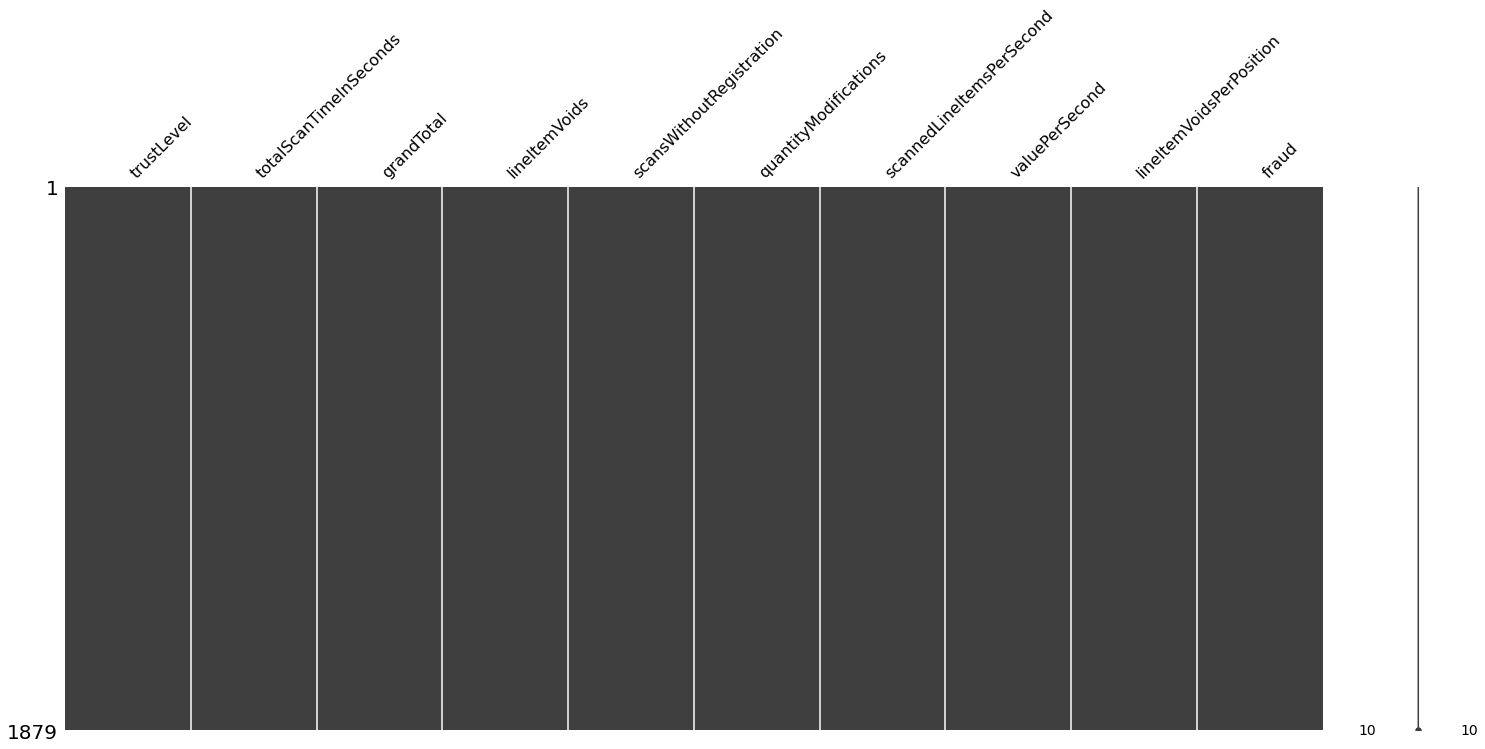

In [63]:
#check for missing values
df_train.isnull().sum().sort_values(ascending=False)
msno.matrix(df_train.sample(df_train.shape[0]))

untuk data X_train tidak ditemukan duplicate values, sehingga data yang dimiliki tetap terjaga dari proses dropping 

In [64]:
#check for number duplicate of data
x = df_train.duplicated().sum()
print("The number of duplicated values is : {}".format(x))

The number of duplicated values is : 0


Pada tahap ini dilakukan proses mengecek proporsi data untuk masing-masing class, berdasarkan plot yang ditampilkan data X_train termasuk dalam Imbalance dataset, hal tersebut karena jumlah data yang memiliki kelas Not Fraud sebesar 94.47% dari kelas fraud yang hanya terdapat 5.53% dari total keseluruhan data sebanyak 1879 instances. oleh karena itu maka harus dilakukan penyeimbangan antara kelas no fraud dan fraud dengan metode sampling.

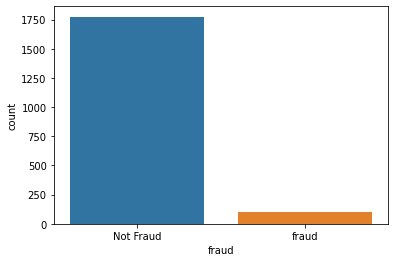

No Frauds 94.47 % of the dataset
Frauds 5.53 % of the dataset


In [65]:
#check number of fraud and not fraud
# visualize the target variable
g = sns.countplot(df_train['fraud'])
g.set_xticklabels(['Not Fraud','fraud'])
plt.show()
print('No Frauds', round(df_train['fraud'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Frauds', round(df_train['fraud'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

Plot dari persebaran count values yang berada pada attribut trustLevel dengan rentang 1 sampai 6, semakin besar nilai trustLevel level maka menandakan tinggka kepercaan terhadap customer tersebut besar.

<AxesSubplot:xlabel='trustLevel', ylabel='count'>

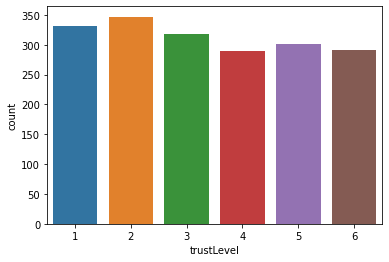

In [66]:
sns.countplot(df_train['trustLevel'])

Pada tahap sebelumnya telah didapatkan informasi bahwa data yang kita miliki merupakan data yang imbalance, oleh karena itu sebelum melakukan pemprosesan kita perlu melakukan penyeimbangan antara data yang minoritas dengan mayoritas, hal tersebut dimaksudkan agar model yang akan kita bangun dapat melakukan proses learning secara mengenali
data yang fraud atau non fraud, karena jika menggunakan data yang tidak seimbang maka model hanya akan mengenali data yang non fraud.
Teknik umum yang dapat dilakukan: 
1. Oversampling

      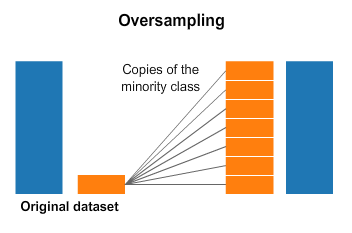


Over sampling merupakan proses untuk penambahan data yang minoritas dengan melakukan copy data mioritas tersebut sehingga membuat data minoritas tersebut memiliki persebaran yang sama dengan data yang mayoritas.

2. Downsampling

  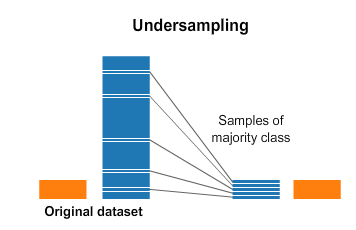

Downsampling merupakan teknik sampling yang dilakukan dengan mengambil sample dari class mayoritas sehingga memiliki kelas yang sama dengan kelas dengan minoritas.

3. SMOTE

  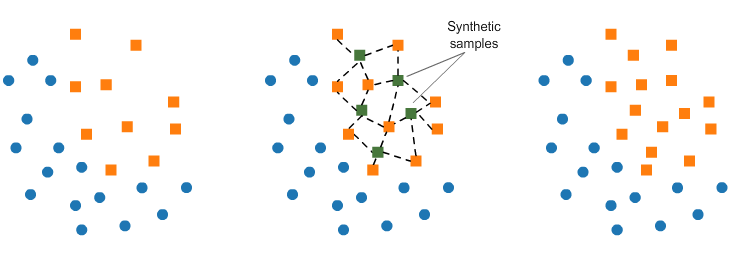

SMOTE (Synthetic Minority Oversampling Technique) bekerja dengan memilih titik secara acak dari kelas minoritas dan menghitung k-terdekat terdekat untuk titik ini. Titik sintetis ditambahkan antara titik yang dipilih dan tetangganya.



ref: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

<h4> Oversampling

In [22]:
from sklearn.utils import resample

df_majority = df_train[df_train.fraud==0]
df_minority = df_train[df_train.fraud==1]
 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_train[df_train.fraud==0].shape[0],    # to match majority class
                                 random_state=123) # reproducible results
df_train = pd.concat([df_majority, df_minority_upsampled])
print(len(df_train))

3550


Hasil dari class yang telah dilakukan oversampling, data yang dimiliki menjadi sama untuk class nofraud dan fraud dengan total rows menjadi 3550.

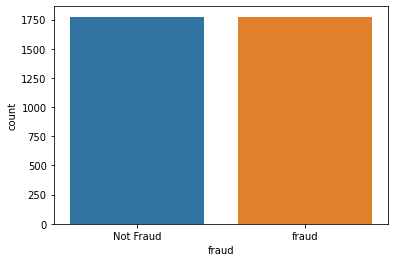

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


In [23]:
g = sns.countplot(df_train['fraud'])
g.set_xticklabels(['Not Fraud','fraud'])
plt.show()
print('No Frauds', round(df_train['fraud'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Frauds', round(df_train['fraud'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

Setelah dilukan proses oversampling, maka selanjutnya adalah melukan perhitungan korelasi antara atribut independent dengan dependent (atribute fraud)  yang memiliki korelasi paling tinggi. Pada grafik heatmap yang didapatkan bahwa:
1. <b>Negative Correlation:</b>

    Negative correlasi meupakan koreksi yang memiliki nilai korelasi paling rendah, <b>trustLevel (-0.71), lineItemVoidsPerPosition (-0.26), valuePerSecond (-0.087)</b> merupakan nilai yang paling sedikit, pada negative correlasi ini menandakan jika attribut tesebut memiliki values kecil maka semakin besar kemungkinan hasil akhirnya adalah fraud
2. <b> Positive Correlation </b>
    Positive Correlasi merupakan korelasi yang memiliki nilai korelasi paling tinggi antara atribut independent terhadap class target (atribute fraud), positive correlasi ini menandakan semakin tinggi nilai dari attribut tersebut maka dimungkinkan semakin besar hasil akhir yang akan didapatkan adalah fraud. attribut yang memiliki positive correlation <b>totalScanTimeInSecond (0.25), scanWithouRegistration(0.17), lineItemVoids (0.12)</b>.

<AxesSubplot:title={'center':'Correlation of Numeric Features with Fraud'}>

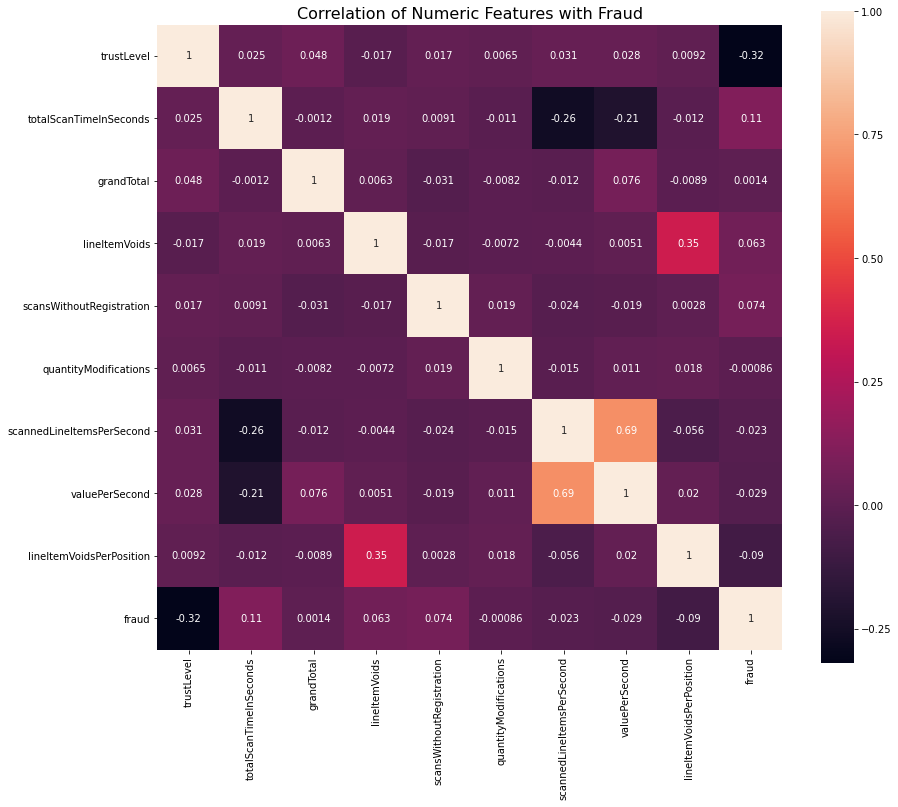

In [67]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Fraud',y=1,size=16)
sns.heatmap(df_train.corr(),square = True, annot = True)

Berikut adalah hasil plot analisis distribusi untuk atribbut pada data X_train

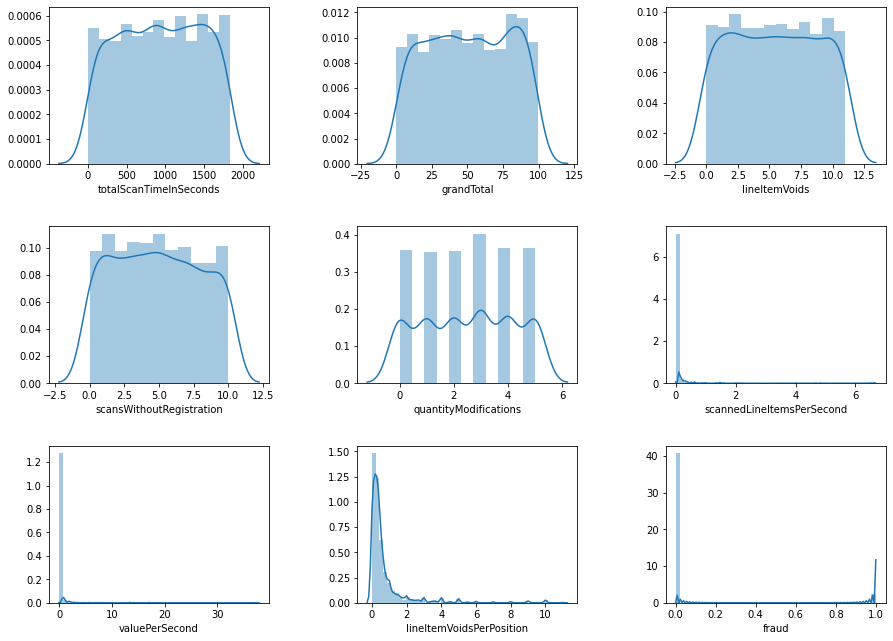

In [35]:
#Univariate Analysis
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(df_train.columns)):
    ax = fig.add_subplot(4, 3, i)
    sns.distplot(df_train[df_train.columns[i]])
    plt.xlabel(df_train.columns[i])

Setelah melakukan proses analisis distribusi, ditahap ini akan dilakukan proses pengecekan outlier pada dataset. dan pada atrribut scannedLineItemsPerSecond, valuesPersecond, dan lineItemVoidsPerPosition. untuk proses ini akan dilakukan handling outlier pada tahap preprocessing.

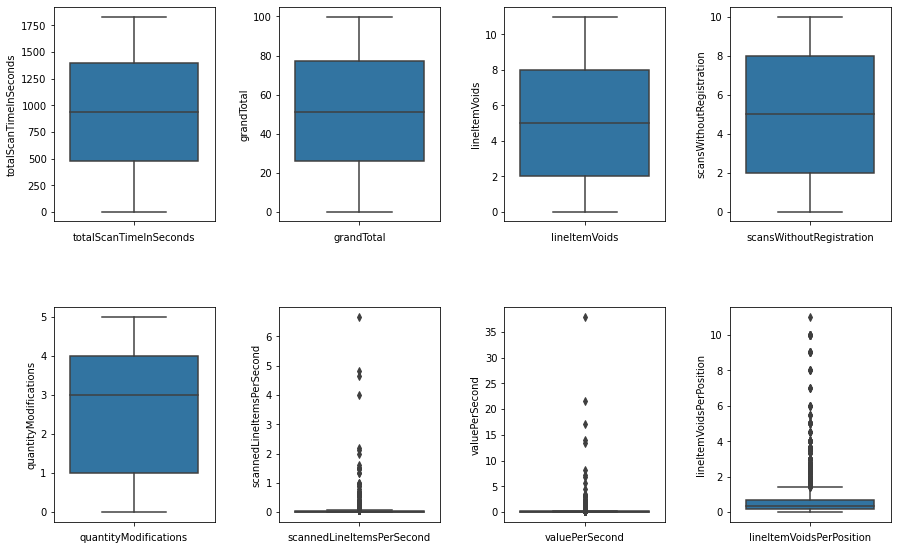

In [68]:
#Univariate Analysis
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(df_train.columns[:-1])):
    ax = fig.add_subplot(3, 4, i)
    sns.boxplot(x=df_train[df_train.columns[i]], orient="v")
    plt.xlabel(df_train.columns[i])

## Preprocessing

Handling With outlier <br>
Pada proses hadling outlier ini adalah mengubah values yang mengalami outlier dengan mengubah menjadi nilai baru dengan menggunakan metode Percentil dengan membandikan nilai dari setiap values dengan hasil quantile(0.95) yang disimpan dalam variabel upper_lim dan quantile(0.05) sebagai lower_lim dari coloum yang dilakukan handling. jika values > upper_lim maka akan diganti dengan upper_lim dan jika values < lower_lim maka akan direplace dengan lowe_lim

In [69]:
#Capping the outlier rows with Percentiles
upper_lim = df_train['scannedLineItemsPerSecond'].quantile(.95)
lower_lim = df_train['scannedLineItemsPerSecond'].quantile(.05)
df_train.loc[(df_train['scannedLineItemsPerSecond'] > upper_lim),'scannedLineItemsPerSecond'] = upper_lim
df_train.loc[(df_train['scannedLineItemsPerSecond'] < lower_lim),'scannedLineItemsPerSecond'] = lower_lim
upper_lim = df_train['valuePerSecond'].quantile(.95)
lower_lim = df_train['valuePerSecond'].quantile(.05)
df_train.loc[(df_train['valuePerSecond'] > upper_lim),'valuePerSecond'] = upper_lim
df_train.loc[(df_train['valuePerSecond'] < lower_lim),'valuePerSecond'] = lower_lim
upper_lim = df_train['lineItemVoidsPerPosition'].quantile(.95)
lower_lim = df_train['lineItemVoidsPerPosition'].quantile(.05)
df_train.loc[(df_train['lineItemVoidsPerPosition'] > upper_lim),'lineItemVoidsPerPosition'] = upper_lim
df_train.loc[(df_train['lineItemVoidsPerPosition'] < lower_lim),'lineItemVoidsPerPosition'] = lower_lim

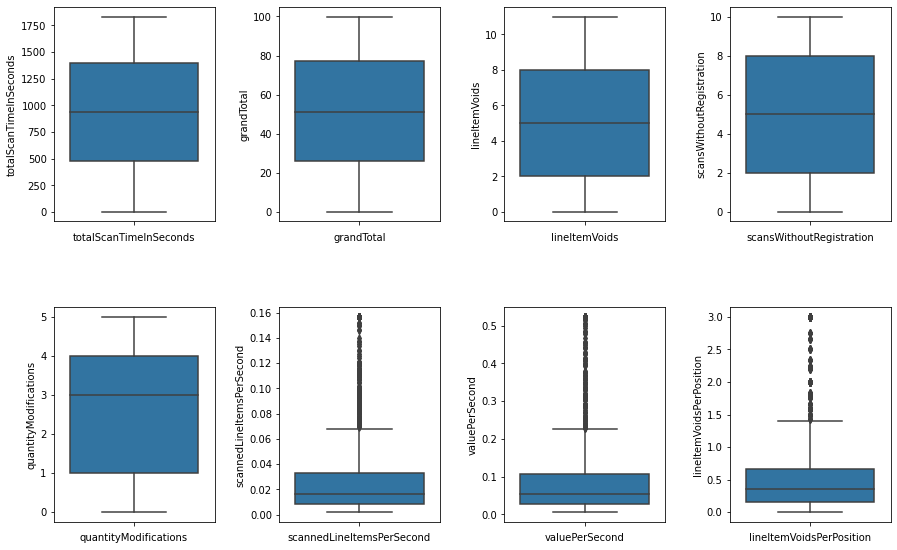

In [70]:
#Univariate Analysis
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(df_train.columns[:-1])):
    ax = fig.add_subplot(3, 4, i)
    sns.boxplot(x=df_train[df_train.columns[i]], orient="v")
    plt.xlabel(df_train.columns[i])

SMOTE

In [71]:
X_train = df_train.iloc[:,0:-1]  #independent columns
y_train = df_train.iloc[:,-1]    #target column 

In [72]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)

In [73]:
from collections import Counter
print("Before: ", Counter(y_train))

Before:  Counter({0: 1775, 1: 1775})


In [76]:
X_train

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,5,1054,54.700000,7,0,3,0.027514,0.051898,0.241379
1,3,108,27.360000,5,2,4,0.129630,0.253333,0.357143
2,3,1516,62.160000,3,10,5,0.008575,0.041003,0.230769
3,6,1791,92.310000,8,4,4,0.016192,0.051541,0.275862
4,5,430,81.530000,3,7,2,0.062791,0.189605,0.111111
...,...,...,...,...,...,...,...,...,...
3545,1,1008,34.149642,3,6,2,0.028418,0.033892,0.110610
3546,1,827,52.537803,4,6,4,0.032274,0.063385,0.179830
3547,1,355,48.721164,3,6,0,0.075903,0.142781,0.126345
3548,1,1785,12.443793,5,1,3,0.015123,0.007346,0.201899


<b>Most Important Attribute</b>

Mengecek keterkaitan antara satu variabel dengan variabel lainnya yang dapat dijadikan sebagai acuan dalam menentukan pemilihan attribut dependent atau independent

[0.57901011 0.05352913 0.01915552 0.03334667 0.02614047 0.02880458
 0.08582348 0.04962107 0.12456897]


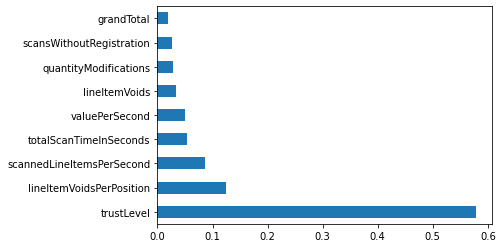

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Setelah dilakukan pengecekan most important atribute, tahap selanjutnya adalah membagi attribut yang dijadikan sebagai data independent dan data dependen, pada hasil tersebut maka attribut dependent adalah coloum <b>'trustLevel','totalScanTimeInSeconds', 'lineItemVoids','scansWithoutRegistration','scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition'</b> sebagai data training untuk menentukan data target yang dalam hal ini adalah sebagai variabel dependent yaitu <b>'fraud'</b>

In [78]:
df_train.columns

Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud'],
      dtype='object')

In [55]:
df_train

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0
...,...,...,...,...,...,...,...,...,...,...
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0


In [79]:
X_train = X_train[['trustLevel', 'totalScanTimeInSeconds', 'lineItemVoids',
       'scansWithoutRegistration',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition']]
# y_train = df_train['fraud']

In [80]:
X_test = X_test[['trustLevel', 'totalScanTimeInSeconds', 'lineItemVoids',
       'scansWithoutRegistration',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition']]

In [81]:
X_train.head()

,trustLevel,totalScanTimeInSeconds,lineItemVoids,scansWithoutRegistration,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,5,1054,7,0,0.027514,0.051898,0.241379
1,3,108,5,2,0.129630,0.253333,0.357143
2,3,1516,3,10,0.008575,0.041003,0.230769
3,6,1791,8,4,0.016192,0.051541,0.275862
4,5,430,3,7,0.062791,0.189605,0.111111


<h2>Built the model Using machine learning algorithm

Setelah data siap digunakan, maka proses selanjutnya adalah proses learning dengan model algortima machine learning, pada proses ini akan mengguanakn 2 algoritma, yaitu Randoom Forest Classifier dan Desicion Tree Classifier.
Alasan dari pemilihan algortima tersebut adalah setelah dilakukan berbagai percobaan algortima klasifikasi didapatkan bahwa berbasis tree mengungguli algoritma yang lain dalam hal menangani imbalance data.

ref: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

<h6> Randoom Forest Classifier

In [82]:
# load library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.8830676874885819
Accuracy score: 0.9695314993746499
F1 score: 0.7111728547776276


Berdasarkan hasil diatas didapatkan nilai masing parameter yang dihasilkan:
    1. ROCAUC score : 86%
    2. Akurasi score : 97%
    3. F1 Score : 74%

<h6>Desicion Tree Classifier (DST)

In [92]:
from sklearn.tree import DecisionTreeClassifier as dt

mod = dt()
mod.fit(X_train, y_train)
predict = mod.predict(X_test)
from sklearn.metrics import *
print('Classification Report of DecisionTree')
print(classification_report(y_test, predict))

Classification Report of DecisionTree
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    474394
           1       0.63      0.75      0.69     23727

    accuracy                           0.97    498121
   macro avg       0.81      0.86      0.83    498121
weighted avg       0.97      0.97      0.97    498121



Berdasarkan hasil diatas didapatkan nilai masing parameter yang dihasilkan:

1. Akurasi score : 97%
2. F1 Score : 70%